In [27]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [28]:
# importing the dataset
dataset = pd.read_csv("iris_dataset_missing.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,2.5,3.0,1.1,Iris-versicolor
1,6.2,2.2,4.5,1.5,Iris-versicolor
2,5.1,3.8,1.5,0.3,Iris-setosa
3,6.8,3.2,5.9,2.3,Iris-virginica
4,5.7,2.8,NaN,1.3,Iris-versicolor


C:\Users\DEEP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\DEEP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


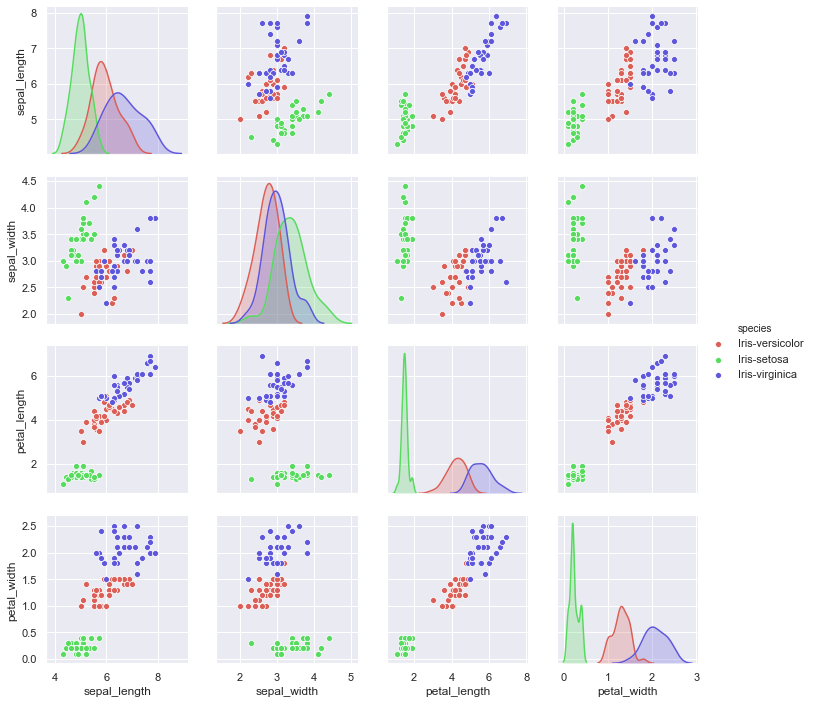

In [29]:
# pair plot to check corelation among different 
sns.pairplot(dataset, hue = "species", palette="hls")

In [30]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,99.000000,98.000000,103.000000
mean,5.873333,3.033333,3.785714,1.195146
std,0.862941,0.450397,1.785509,0.783203
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.750000,1.600000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.300000,5.100000,1.900000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
dataset.dropna()
correlation_data = dataset.corr()

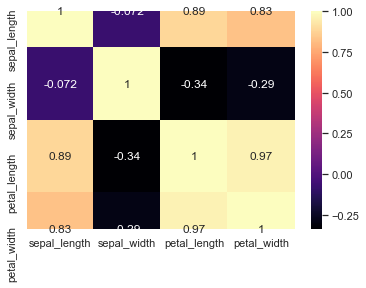

In [32]:
sns.heatmap(correlation_data, cmap='magma', annot= True, cbar= True)

In [33]:
print(correlation_data)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.072446      0.889027     0.829923
sepal_width      -0.072446     1.000000     -0.336760    -0.288402
petal_length      0.889027    -0.336760      1.000000     0.965223
petal_width       0.829923    -0.288402      0.965223     1.000000


In [34]:
dataset.dropna(subset= ['sepal_width','petal_length','petal_width'],inplace=True)

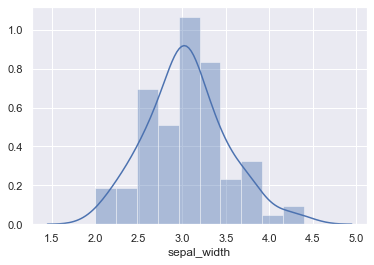

In [35]:
sns.distplot(dataset['sepal_width'], hist = True, kde = True)

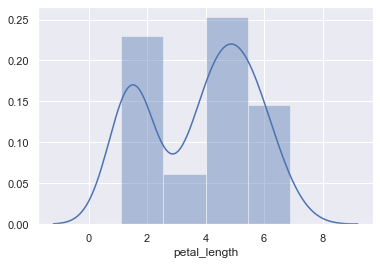

In [36]:
sns.distplot(dataset['petal_length'], hist = True, kde = True)

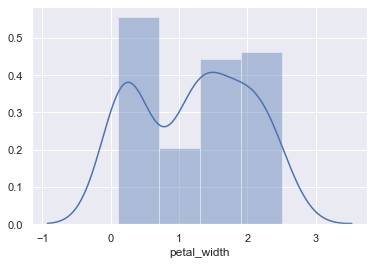

In [37]:
sns.distplot(dataset['petal_width'], hist = True, kde = True)

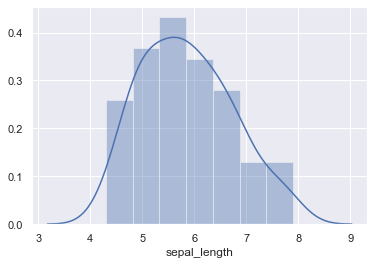

In [38]:
sns.distplot(dataset['sepal_length'], hist = True, kde = True)

In [39]:
# applying stats method to find skewness of each data column
from scipy.stats import skew
print(f"Skewness of the sepal_length: {skew(dataset['sepal_length'])}")
print(f"Skewness of the sepal_width: {skew(dataset['sepal_width'])}")
print(f"Skewness of the petal_length: {skew(dataset['petal_length'])}")
print(f"Skewness of the petal_width: {skew(dataset['petal_width'])}")      

Skewness of the sepal_length: 0.37461643861339866
Skewness of the sepal_width: 0.3282150777476098
Skewness of the petal_length: -0.22649008227352382
Skewness of the petal_width: -0.05587862111481078


In [40]:
# applying stats method to find kurtosis for each data column
from scipy.stats import kurtosis
print(f"kurtosis of the sepal_length: {kurtosis(dataset['sepal_length'])}")
print(f"kurtosis of the sepal_width: {kurtosis(dataset['sepal_width'])}")
print(f"kurtosis of the petal_length: {kurtosis(dataset['petal_length'])}")
print(f"kurtosis of the petal_width: {kurtosis(dataset['petal_width'])}")      

kurtosis of the sepal_length: -0.6076114978859675
kurtosis of the sepal_width: 0.25151150676502443
kurtosis of the petal_length: -1.4023848890157684
kurtosis of the petal_width: -1.3747051897297387


In [41]:
# seperating features and labels and converting them to numpy array
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [42]:
# creating train test validation split for the dataset
from sklearn.model_selection import train_test_split

X_train, X_sep, y_train, y_sep = train_test_split(X, y, test_size = 0.4, random_state = 275)
X_test, X_val, y_test, y_val = train_test_split(X_sep, y_sep, test_size = 0.5, random_state = 275)

print(X_val.shape)
print(X_test.shape)
print(X_train.shape)

(18, 4)
(18, 4)
(54, 4)


In [43]:
# Default training for KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5 0 0]
 [0 7 1]
 [0 0 5]]


0.9444444444444444

In [45]:
# Default training for KNN Model
k_val = []
accuracy = []
for k in range(1,36):
    if k == 1:
        knn1 = KNeighborsClassifier(n_neighbors=k)
        knn1.fit(X_train, y_train)
        print(k)
        y_pred = knn1.predict(X_val)
        scr = accuracy_score(y_val, y_pred)
        accuracy.append(scr)
    elif k%5==0:
        knn1 = KNeighborsClassifier(n_neighbors=k)
        knn1.fit(X_train, y_train)
        print(k)
        y_pred = knn1.predict(X_val)
        scr = accuracy_score(y_val, y_pred)
        accuracy.append(scr)

1
5
10
15
20
25
30
35


Text(0.5, 1.0, 'K-NN at different values of K')

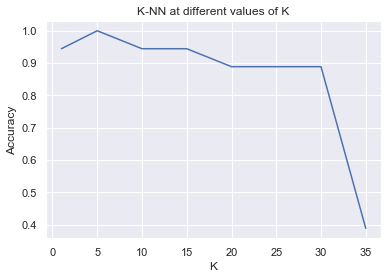

In [46]:
# classification v/s accuracy curve to report the best value of K
k = [1, 5, 10, 15, 20, 25, 30, 35]
plt.plot(k, accuracy)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K-NN at different values of K")

In [47]:
# testing on different distance metrics for the perfect model
# p = 1 manhattan, p = 2 eucliden, p = random minkowski
knn_2 = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
knn_2.fit(X_train, y_train)

y_pred_2 = knn_2.predict(X_val)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_val, y_pred_2)
print(cm)
accuracy_score(y_val, y_pred_2)

[[9 0 0]
 [0 1 0]
 [0 1 7]]


0.9444444444444444

In [48]:
# testing on different distance metrics for the perfect model
# p = 1 manhattan, p = 2 eucliden, p = random minkowski
knn_2 = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)
knn_2.fit(X_train, y_train)

y_pred_2 = knn_2.predict(X_val)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_val, y_pred_2)
print(cm)
accuracy_score(y_val, y_pred_2)

[[9 0 0]
 [0 1 0]
 [0 0 8]]


1.0

In [49]:
# best model at k = 2, weight = distance and eucliden's distance metric
# scaling data on a standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [50]:
knn_final = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)
knn_final.fit(X_train, y_train)

y_pred = knn_final.predict(X_test)

In [51]:
# final results and performance metrics
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5 0 0]
 [0 7 1]
 [0 0 5]]


0.9444444444444444

In [52]:
# references: 
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://seaborn.pydata.org/generated/seaborn.distplot.html
# https://scikit-learn.org/stable/modules/classes.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric
# https://archive.ics.uci.edu/ml/datasets/heart+disease
# https://towardsdatascience.com/heart-disease-prediction-73468d630cfc